In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

Lets consider WLLN first. 
We will sample from binomial RV and keep track of the sample average as the length of the sample increases. 

In [2]:
rng = np.random.default_rng(36289)

In [3]:
# Here are the binomial parameters.
n = 50
p = 0.74
# And this is the population mean
mu = n*p

In [4]:
# This is the longest sample we will consider
N = 5000
# This array will store the sample averages
sampav = np.zeros((N))
# This will be the current sum
sum = 0

In [5]:
for i in range(N):
    value = rng.binomial(n, p, 1)
    sum += value
    sampav[i] = sum / (i+1)

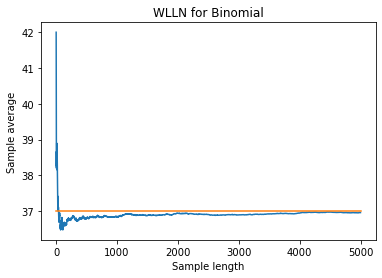

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(sampav)
ax.plot([0,N], [mu,mu])
ax.set_xlabel('Sample length')
ax.set_ylabel('Sample average')
ax.set_title('WLLN for Binomial')
plt.show()

Let's try the same thing with a very fat-tailed distribution - Cauchy

In [7]:
# This is the longest sample we will consider
NC = 10000
# This array will store the sample averages
sampav_cauchy = np.zeros((NC))
# This will be the current sum
sum_cauchy = 0

In [8]:
for i in range(NC):
    valuec = rng.standard_cauchy(1)
    sum_cauchy += valuec
    sampav_cauchy[i] = sum_cauchy / (i+1)

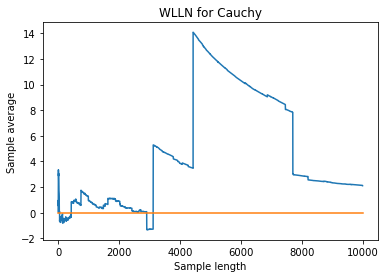

In [9]:
fig1, ax1 = plt.subplots(1, 1)
ax1.plot(sampav_cauchy)
ax1.plot([0,NC], [0,0])
ax1.set_xlabel('Sample length')
ax1.set_ylabel('Sample average')
ax1.set_title('WLLN for Cauchy')
plt.show()

Now lets look at CLT for Uniform(0,4)

We will plot the histograms for 500 samples of the following sizes and compare them with the CLT Gaussians

In [10]:
sizes = [2, 5, 20, 50, 200, 500]

# We will save the sample means in a dataframe
df = pd.DataFrame()

# And here is how many samples we will get of each size
samples = 500

#The bounds of the Uniform
low = 0
high = 4

In [11]:
for size in sizes:
    # Internal DataFrame holding the samples
    int_df = pd.DataFrame()
    
    for k in range(samples):
        uniform_sample = rng.uniform(low=low, high=high, size=size)
        cols = f'sample {k}'
        int_df[cols] = uniform_sample
        
    col = f'Sample size {size}'
    df[col] = int_df.mean()

/tmp/ipykernel_11904/2897899882.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  int_df[cols] = uniform_sample


In [12]:
# print(df)

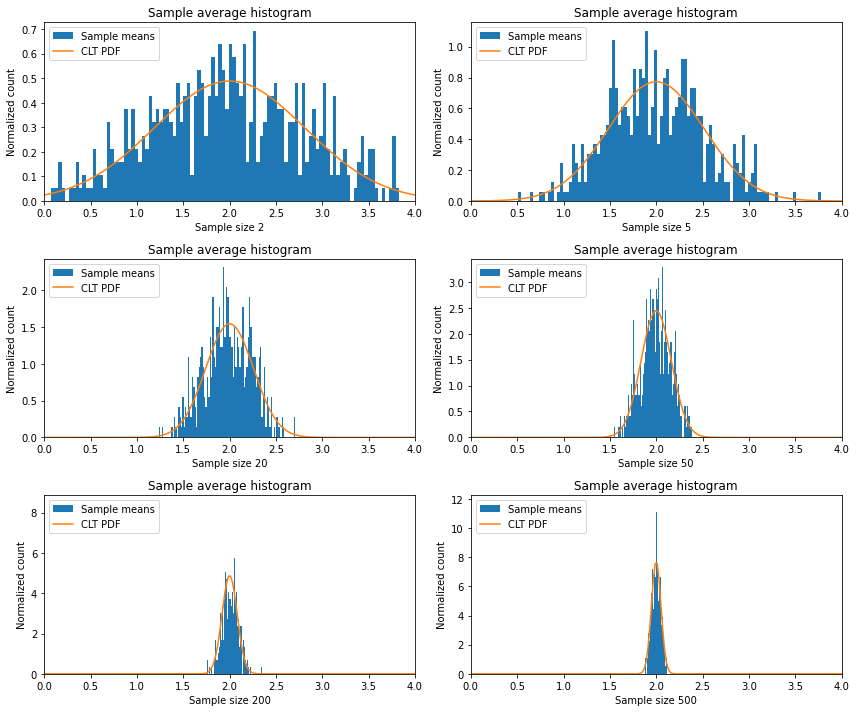

In [13]:
fig2, ax2 = plt.subplots(3, 2, figsize=[12,10])

for i, axi in enumerate(ax2.flat):
    size = sizes[i]
    axi.hist(df[f'Sample size {size}'], density=True, bins=100, label="Sample means")
    llim = 0
    rlim = 4
    axi.set_xlim(llim, rlim)
    ticks = np.linspace(llim, rlim, 200)
    rv = st.norm(loc=(low+high)/2, scale=(high-low)/(12*size)**0.5)
    axi.plot(ticks, rv.pdf(ticks), label="CLT PDF", color='tab:orange')
    axi.legend(loc="upper left")
    axi.set_ylabel('Normalized count')
    axi.set_xlabel(f'Sample size {size}')
    axi.set_title("Sample average histogram");

plt.tight_layout()
plt.show()

Let's try CLT for Cauchy

In [14]:
# We will save the sample means in a dataframe
dfc = pd.DataFrame()

# And here is how many samples we will get of each size
samples = 500

In [15]:
for size in sizes:
    # Internal DataFrame holding the samples
    int_df = pd.DataFrame()
    
    for k in range(samples):
        cauchy_sample = rng.standard_cauchy(size=size)
        cols = f'sample {k}'
        int_df[cols] = cauchy_sample
        
    col = f'Sample size {size}'
    dfc[col] = int_df.mean()

/tmp/ipykernel_11904/2186990722.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  int_df[cols] = cauchy_sample


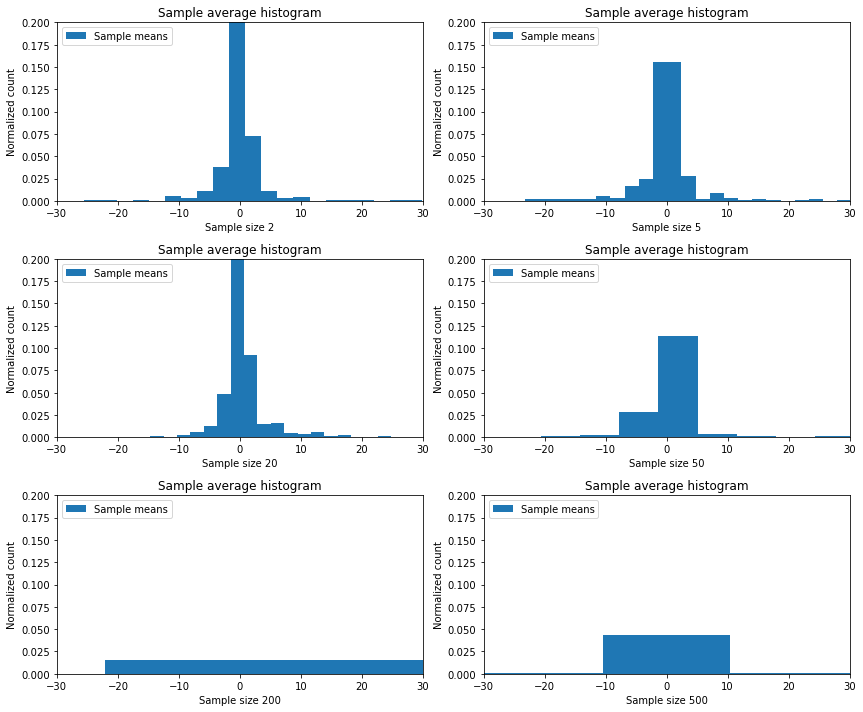

In [16]:
fig3, ax3 = plt.subplots(3, 2, figsize=[12,10])

for i, axi in enumerate(ax3.flat):
    size = sizes[i]
    axi.hist(dfc[f'Sample size {size}'], density=True, bins=100, label="Sample means")
    llim = -30
    rlim = 30
    axi.set_xlim(llim, rlim)
    axi.set_ylim(0.0, 0.2)
    axi.legend(loc="upper left")
    axi.set_ylabel('Normalized count')
    axi.set_xlabel(f'Sample size {size}')
    axi.set_title("Sample average histogram");

plt.tight_layout()
plt.show()

1. Demonstrate WLLN and CLT for a distribution from the gamma family.
2. Demonstrate the failure of WLLN and CLT for a distribution from the Pareto family.